**Linear Regression**

In [1]:
# Load Data and drop columns
import pandas as pd
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
columns = df.columns
df.head()
df.drop("Serial No.", axis=1, inplace=True)
y = df["Chance of Admit "]
df.drop("Chance of Admit ", axis=1, inplace=True)
# Display the first few rows to confirm changes
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [2]:
# Split X,y into training and testing sets 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
pred

array([0.91457473, 0.79518127, 0.57265986, 0.70736968, 0.81588282,
       0.86206561, 0.47459746, 0.64850923, 0.82378728, 0.80741498,
       0.72193204, 0.72589118, 0.65632227, 0.93677168, 0.8241518 ,
       0.50979177, 0.83931942, 0.59727295, 0.53339576, 0.57155958,
       0.66548168, 0.55305833, 0.72232308, 0.79506004, 0.78027648,
       0.60248654, 0.94840363, 0.84741471, 0.62777011, 0.74343096,
       0.55533035, 0.73004034, 0.54474225, 0.86116288, 0.65713016,
       0.7371816 , 0.55423839, 0.95718977, 0.64364267, 0.71057279,
       0.97036982, 0.57495143, 0.67075391, 0.85830422, 0.94112903,
       0.57793762, 0.9583926 , 0.83902765, 0.79591651, 0.92570648,
       0.88805969, 0.56366238, 0.70359711, 0.52658929, 0.9536427 ,
       0.59746814, 0.95600396, 0.73916386, 0.66256982, 0.5012903 ,
       0.62950759, 0.68031188, 0.59896721, 0.59203806, 0.44085868,
       0.58866369, 0.8667547 , 0.89783006, 0.65831807, 0.70667392,
       0.6176818 , 0.78587721, 0.69152566, 0.56271019, 0.55429

In [3]:
# Regression
from sklearn import metrics
import numpy as np
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
rmse

0.06086588041578311

In [4]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
df1 = pd.DataFrame(df, columns=columns[1:8])
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2, random_state=42)
df1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


In [5]:
# Again apply linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
rmse

0.06086588041578312

***Activity 2***

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:

# Drop irrelevant columns (if any, here we keep all relevant features)
X = df.copy()


In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Apply Regression without scaling
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse_before_scaling = np.sqrt(mean_squared_error(y_test, y_pred))


In [6]:
# Scale the data (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Apply Regression after scaling
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
rmse_after_scaling = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f"RMSE before Scaling: {rmse_before_scaling:.4f}")
print(f"RMSE after Scaling: {rmse_after_scaling:.4f}")


RMSE before Scaling: 0.7284
RMSE after Scaling: 0.7284


***PreProcessing Pipeline***

In [25]:
# Preprocessing pipeline
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [19]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Define the preprocessing steps in the pipeline
preprocessor = Pipeline([('scaler'), StandardScaler()])

In [27]:
# Define the classifiers
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()

In [28]:
# Define pipelines correctly
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),  # Transformer step
    ('knn', KNeighborsRegressor(n_neighbors=5))  # Final estimator (must be a model)
])

pipe_dt = Pipeline([
    ('scaler', StandardScaler()),  # Transformer step (optional for DT)
    ('dt', DecisionTreeRegressor(random_state=42))  # Final estimator
])

In [29]:
# Fit the pipelines
pipe_knn.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeRegressor(random_state=42))])

In [30]:
# Make Predictions
y_pred_knn = pipe_knn.predict(X_test)
y_pred_dt = pipe_dt.predict(X_test)

***KNN Implementation***

In [34]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
labels = iris.target
for i in [0, 79, 99, 121]:
    print(f"index: {i}, features: {data[i]}, label: {labels[i]}")


index: 0, features: [5.1 3.5 1.4 0.2], label: 0
index: 79, features: [5.7 2.6 3.5 1. ], label: 1
index: 99, features: [5.7 2.8 4.1 1.3], label: 1
index: 121, features: [5.6 2.8 4.9 2. ], label: 2


In [35]:
indices = np.random.permutation(len(data))
n_test_samples = 12
learn_data = data[indices[:-n_test_samples]]
learn_labels = labels[indices[:-n_test_samples]]
test_data = data[indices[-n_test_samples:]]
test_labels = labels[indices[-n_test_samples:]]


In [36]:
print("The first samples of our learn set:")
print(f"{'index'}{'data'}{'label'}")
for i in range(5):
    print(f"{i} {learn_data[i]} {learn_labels[i]}")
print("The first samples of our test set:")
print(f"{'index'}{'data'}{'label'}")
for i in range(5):
    print(f"{i} {test_data[i]} {test_labels[i]}")


The first samples of our learn set:
indexdatalabel
0 [4.9 3.1 1.5 0.2] 0
1 [6.4 2.7 5.3 1.9] 2
2 [5.1 3.8 1.6 0.2] 0
3 [7.7 3.8 6.7 2.2] 2
4 [5.4 3.4 1.7 0.2] 0
The first samples of our test set:
indexdatalabel
0 [6.8 3.  5.5 2.1] 2
1 [6.3 2.7 4.9 1.8] 2
2 [6.7 3.  5.  1.7] 1
3 [5.  3.6 1.4 0.2] 0
4 [7.2 3.2 6.  1.8] 2


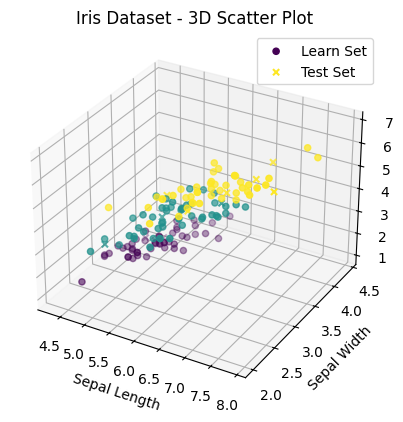

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.scatter(learn_data[:, 0], learn_data[:, 1], learn_data[:, 2], c=learn_labels, cmap='viridis', label='Learn Set')# Plotting the test set
ax.scatter(test_data[:, 0], test_data[:, 1], test_data[:, 2], c=test_labels, cmap='viridis', marker='x', label='Test Set')# Set labels for each axis
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')# Set the title of the plot
ax.set_title('Iris Dataset - 3D Scatter Plot')# Add a legend
ax.legend()# Display the plot
plt.show()


In [38]:
import numpy as np
def distance(instance1, instance2):
    instance1 = np.array(instance1)
    instance2 = np.array(instance2)
    return np.linalg.norm(instance1 - instance2)
print(distance([3, 5], [1, 1]))
print(distance(learn_data[3], learn_data[44]))


4.47213595499958
4.13763217311544


In [39]:
def get_neighbors(training_set, labels, test_instance, k, distance):
    distances = []
    for train, label in zip(training_set, labels):
        dist = distance(test_instance, train)
        distances.append((train, dist, label))
    distances.sort(key=lambda x: x[1])
    return distances[:k]
for i in range(5):
    neighbors = get_neighbors(learn_data, learn_labels, test_data[i], 3, distance=distance)
    print(f"Index: {i}\nTestset Data: {test_data[i]}\nTestset Label: {test_labels[i]}\nNeighbors: {neighbors}\n")


Index: 0
Testset Data: [6.8 3.  5.5 2.1]
Testset Label: 2
Neighbors: [(array([6.9, 3.1, 5.4, 2.1]), 0.17320508075688787, 2), (array([6.7, 3.1, 5.6, 2.4]), 0.34641016151377513, 2), (array([6.9, 3.2, 5.7, 2.3]), 0.3605551275463991, 2)]

Index: 1
Testset Data: [6.3 2.7 4.9 1.8]
Testset Label: 2
Neighbors: [(array([6.2, 2.8, 4.8, 1.8]), 0.17320508075688762, 2), (array([6.3, 2.5, 5. , 1.9]), 0.24494897427831777, 2), (array([6.1, 3. , 4.9, 1.8]), 0.3605551275463989, 2)]

Index: 2
Testset Data: [6.7 3.  5.  1.7]
Testset Label: 1
Neighbors: [(array([6.9, 3.1, 4.9, 1.5]), 0.31622776601683794, 1), (array([6.7, 3.1, 4.7, 1.5]), 0.374165738677394, 1), (array([6.5, 3. , 5.2, 2. ]), 0.41231056256176624, 2)]

Index: 3
Testset Data: [5.  3.6 1.4 0.2]
Testset Label: 0
Neighbors: [(array([4.9, 3.6, 1.4, 0.1]), 0.14142135623730925, 0), (array([5.1, 3.5, 1.4, 0.2]), 0.1414213562373093, 0), (array([5.1, 3.5, 1.4, 0.3]), 0.17320508075688756, 0)]

Index: 4
Testset Data: [7.2 3.2 6.  1.8]
Testset Label: 2
Nei

In [40]:
from collections import Counter

def vote(neighbors):
    class_counter = Counter(neighbor[2] for neighbor in neighbors)
    return class_counter.most_common(1)[0][0]

count = 0
for i in range(n_test_samples):
    neighbors = get_neighbors(learn_data, learn_labels, test_data[i], 1, distance=distance)
    if test_labels[i] == vote(neighbors):
        count += 1
    print("Index:", i, ", Result of Vote:", vote(neighbors), ", Label:", test_labels[i], ", Data:", test_data[i])

accuracy = count / n_test_samples
print("Accuracy:", accuracy)


Index: 0 , Result of Vote: 2 , Label: 2 , Data: [6.8 3.  5.5 2.1]
Index: 1 , Result of Vote: 2 , Label: 2 , Data: [6.3 2.7 4.9 1.8]
Index: 2 , Result of Vote: 1 , Label: 1 , Data: [6.7 3.  5.  1.7]
Index: 3 , Result of Vote: 0 , Label: 0 , Data: [5.  3.6 1.4 0.2]
Index: 4 , Result of Vote: 2 , Label: 2 , Data: [7.2 3.2 6.  1.8]
Index: 5 , Result of Vote: 2 , Label: 2 , Data: [7.7 3.  6.1 2.3]
Index: 6 , Result of Vote: 0 , Label: 0 , Data: [5.  3.4 1.6 0.4]
Index: 7 , Result of Vote: 1 , Label: 1 , Data: [5.  2.3 3.3 1. ]
Index: 8 , Result of Vote: 2 , Label: 2 , Data: [7.2 3.6 6.1 2.5]
Index: 9 , Result of Vote: 2 , Label: 2 , Data: [5.8 2.8 5.1 2.4]
Index: 10 , Result of Vote: 1 , Label: 1 , Data: [5.7 2.8 4.1 1.3]
Index: 11 , Result of Vote: 0 , Label: 0 , Data: [4.8 3.4 1.6 0.2]
Accuracy: 1.0


***Activity 4***

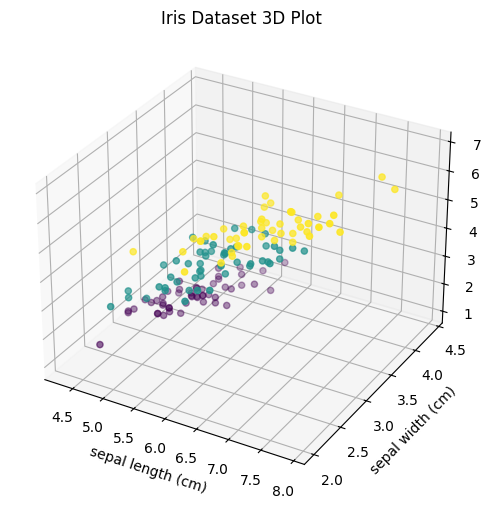

KNN Model Accuracy (K=3): 100.00%


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter

# Load Iris Dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 3D Plot of the first three features
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['target'], cmap='viridis')
ax.set_xlabel(data.feature_names[0])
ax.set_ylabel(data.feature_names[1])
ax.set_zlabel(data.feature_names[2])
plt.title("Iris Dataset 3D Plot")
plt.show()

# Split dataset into train and test
X = df.iloc[:, :-1].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to compute Euclidean distance
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to find K=3 nearest neighbors
def get_neighbors(X_train, y_train, test_point, k=3):
    distances = [(euclidean_distance(test_point, X_train[i]), y_train[i]) for i in range(len(X_train))]
    distances.sort(key=lambda x: x[0])  # Sort by distance
    return [distances[i][1] for i in range(k)]  # Return the K nearest labels

# Function to perform majority voting
def predict(X_train, y_train, test_point, k=3):
    neighbors = get_neighbors(X_train, y_train, test_point, k)
    most_common = Counter(neighbors).most_common(1)
    return most_common[0][0]  # Return the most common class

# Function to calculate accuracy
def calculate_accuracy(X_train, y_train, X_test, y_test, k=3):
    predictions = [predict(X_train, y_train, x, k) for x in X_test]
    accuracy = np.mean(np.array(predictions) == y_test) * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(X_train, y_train, X_test, y_test, k=3)
print(f"KNN Model Accuracy (K=3): {accuracy:.2f}%")
